# 5.3 SVM回归

SVM不仅支持线性和非线性分类，而且还支持线性和非线性回归。**诀窍在于将目标反转一下：不再尝试拟合两个分类之间可能的最宽街道的同时限制间隔违例，SVM回归要做的是让尽可能多的实例位于街道上，同时限制间隔违例（也就是不再街道上的实例）**。街道的宽度由超参数 $\epsilon$ 控制


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
m = 50
X = 2 * np.random.randn(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()
X.shape, y.shape

((50, 1), (50,))

In [4]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [5]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

LinearSVR(epsilon=0.5, random_state=42)

In [6]:
def find_support_vectors(svm_reg:LinearSVR, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y-y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

In [7]:
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

In [8]:
def plot_svm_regressoin(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, 'k-', linewidth=2, label=r'$\hat{y}$')
    plt.plot(x1s, y_pred+svm_reg.epsilon, 'k--')
    plt.plot(x1s, y_pred-svm_reg.epsilon, 'k--')
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=120, facecolor="#FFAAAA")
    plt.plot(X, y, 'bo')
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.axis(axes)
    plt.legend(loc="upper left", fontsize=18)

Text(0.91, 5.6, '$\\epsilon$')

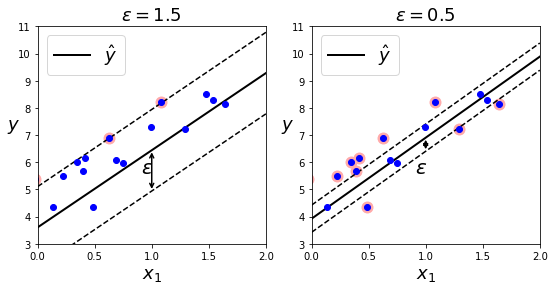

In [9]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])
plot_svm_regressoin(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r'$\epsilon={}$'.format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r'$y$', fontsize=18, rotation=0)
plt.annotate('', xy=(eps_x1, eps_y_pred), xycoords='data', xytext=(eps_x1, eps_y_pred-svm_reg1.epsilon), textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5})
plt.text(0.91, 5.6, r'$\epsilon$', fontsize=20)

plt.subplot(122)
eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])
plot_svm_regressoin(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r'$\epsilon={}$'.format(svm_reg2.epsilon), fontsize=18)
plt.ylabel(r'$y$', fontsize=18, rotation=0)
plt.annotate('', xy=(eps_x1, eps_y_pred), xycoords='data', xytext=(eps_x1, eps_y_pred-svm_reg2.epsilon), textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5})
plt.text(0.91, 5.6, r'$\epsilon$', fontsize=20)

在间隔内添加更多的实力不会影响模型的预测，所以这个模型被称为 $\epsilon$ 不敏感

要解决非线性回归任务，可以使用核化的SVM模型。

In [10]:
m = 100
X = np.random.randn(m, 1) * 2 - 1
y = (0.2 + 0.1 * X + 0.5 * X  ** 2 + np.random.randn(m, 1)/10).ravel()


In [11]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='auto')
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, gamma='auto', kernel='poly')

In [12]:
svm_poly_reg1 = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='auto')
svm_poly_reg2 = SVR(kernel='poly', degree=2, C=0.005, epsilon=0.1, gamma='auto')

svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.005, degree=2, gamma='auto', kernel='poly')

In [13]:
svm_poly_reg1.support_, svm_poly_reg2.support_

(array([ 4,  6,  9, 13, 16, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 34, 35,
        36, 41, 44, 46, 47, 48, 50, 51, 52, 54, 55, 56, 59, 60, 62, 63, 64,
        65, 66, 67, 68, 71, 74, 75, 77, 79, 84, 85, 90], dtype=int32),
 array([ 4,  5,  6,  9, 10, 13, 14, 16, 18, 20, 21, 22, 23, 25, 27, 28, 34,
        35, 36, 39, 40, 41, 42, 44, 48, 50, 52, 54, 55, 56, 59, 60, 62, 63,
        65, 66, 67, 68, 71, 74, 75, 77, 79, 82, 83, 84, 85, 90, 92, 93],
       dtype=int32))

Text(0, 0.5, '$y$')

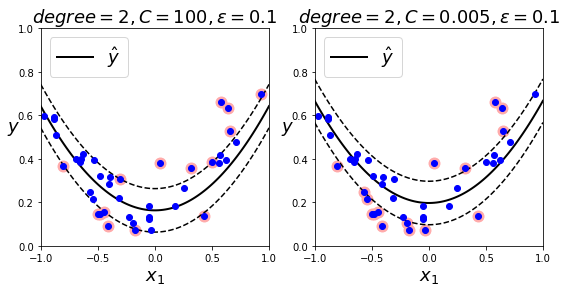

In [14]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regressoin(svm_poly_reg1, X, y, [-1, 1, 0 , 1])
plt.title(r"$degree={}, C={}, \epsilon={}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.subplot(122)
plot_svm_regressoin(svm_poly_reg2, X, y, [-1, 1, 0 , 1])
plt.title(r"$degree={}, C={}, \epsilon={}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

上图中左图几乎没有正则化（C值很大），右图过渡正则化（C值很小）

`LinearSVR`与训练集的大小线性相关（与`LinearSVC`一样），而`SVR`则在训练集变大时，变得很慢(`SVC`也一样)

`SVM`还可以用于异常值检测，https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection